In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('heart.csv')

In [24]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [25]:
df.shape

(299, 13)

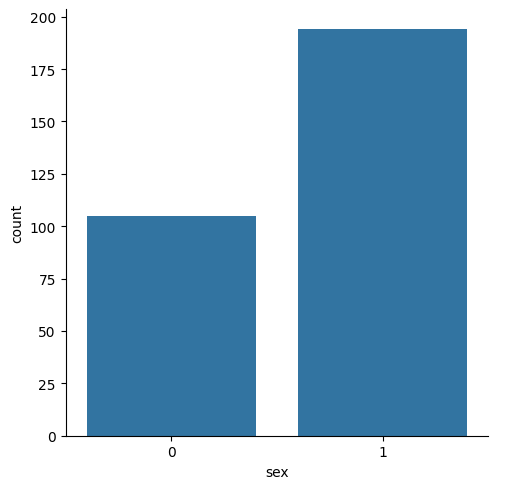

In [26]:
sns.catplot(x='sex', data = df, kind='count')

<Axes: xlabel='age', ylabel='smoking'>

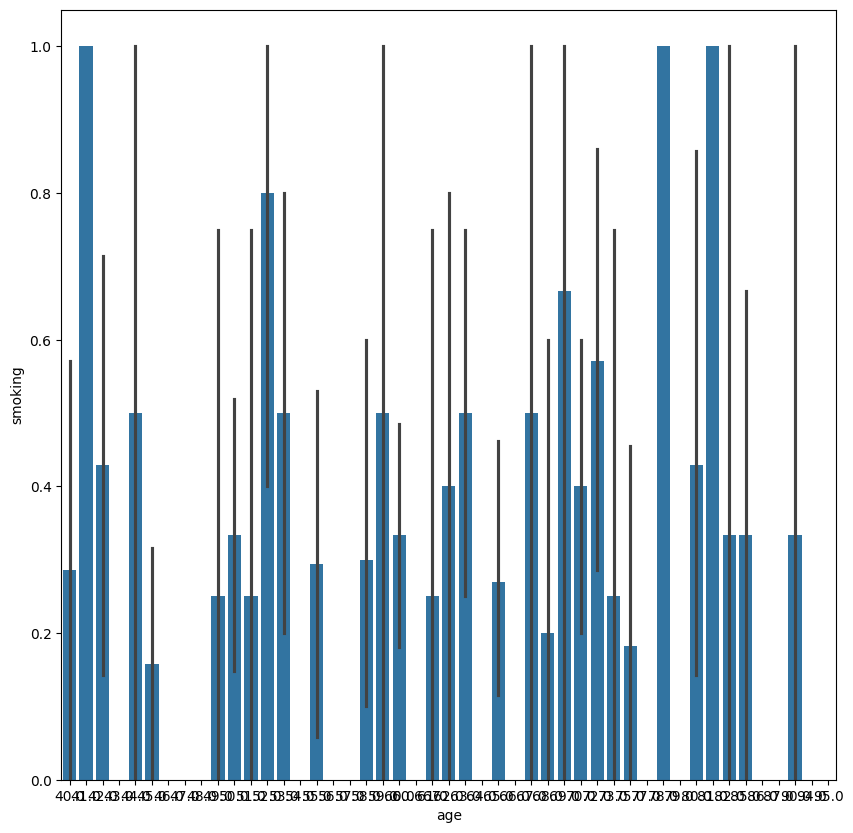

In [27]:
plot = plt.figure(figsize=(10,10))
sns.barplot(x='age', y='smoking', data=df)

<Axes: >

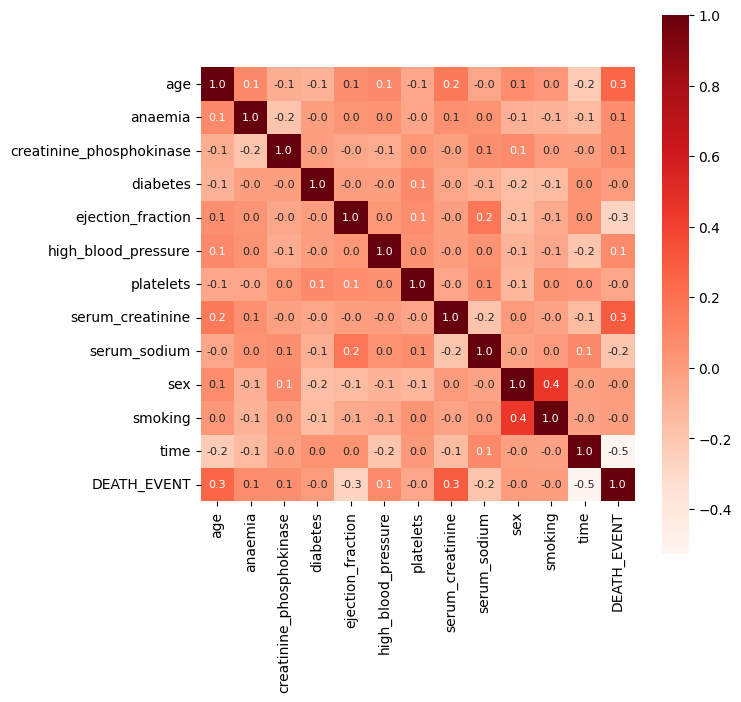

In [28]:
correlation = df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap = 'Reds')

In [29]:
x = df.drop('DEATH_EVENT', axis=1)

In [30]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [31]:
y = df['DEATH_EVENT']

In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=4)

In [35]:
from sklearn.metrics import accuracy_score
x_pred = model.predict(x_test)
test_data = accuracy_score(x_pred, y_test)

In [36]:
print('Accuracy', test_data * 100) 

Accuracy 83.33333333333334


In [37]:
input_data = (12, 45.000, 1, 981, 0, 30, 0, 136000.00, 1.10, 137, 1, 11)
np_arr = np.asarray(input_data)
reshape = np_arr.reshape(1, -1)
prediction = model.predict(reshape)
print(prediction)
if prediction==1:
    print('Might be in Danger')
else:
    print('Good')

[1]
Might be in Danger


c:\Users\ali\Documents\py-env\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.model_selection import GridSearchCV



param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [39]:
print(best_model)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=4)


In [40]:
print(best_params)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [41]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains true labels and y_pred contains predicted labels
# Generate predictions using your model on the test data
y_pred = model.predict(x_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[33  4]
 [ 6 17]]


In [42]:
#import pickle
#
#with open('model.pkl', 'wb') as file:
#    pickle.dump(model, file)